# Compare Result Equity 

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
from config.constants import *
from util.plot_equity import plot_equity_trades
import matplotlib.pyplot as plt
from util.load_data import load_data

## Load result strategy

In [3]:
strategy = {}

### Data XAUUSD

In [4]:
XAUUSD = load_data()

###  EURUSD

In [5]:
EURUSD = {}
file = 'EURUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [6]:
EURUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
EURUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
EURUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
EURUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

In [7]:
strategy['XAUUSD_EURUSD'] = EURUSD

###  AUDUSD

In [8]:
AUDUSD = {}
file = 'AUDUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [9]:
AUDUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
AUDUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
AUDUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
AUDUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

#### Reindex

In [10]:
AUDUSD['D1'] = AUDUSD['D1'].reindex(EURUSD['D1'].index, method='ffill')  # fill forward
AUDUSD['H4'] = AUDUSD['H4'].reindex(EURUSD['H4'].index, method='ffill')  # fill forward
AUDUSD['H1'] = AUDUSD['H1'].reindex(EURUSD['H1'].index, method='ffill')  # fill forward
AUDUSD['M30'] = AUDUSD['M30'].reindex(EURUSD['M30'].index, method='ffill')  # fill forward

In [11]:
strategy['XAUUSD_AUDUSD'] = AUDUSD

###  GBPUSD

In [12]:
GBPUSD = {}
file = 'GBPUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [13]:
GBPUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
GBPUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
GBPUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
GBPUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

#### Reindex

In [14]:
GBPUSD['D1'] = GBPUSD['D1'].reindex(EURUSD['D1'].index, method='ffill')  # fill forward
GBPUSD['H4'] = GBPUSD['H4'].reindex(EURUSD['H4'].index, method='ffill')  # fill forward
GBPUSD['H1'] = GBPUSD['H1'].reindex(EURUSD['H1'].index, method='ffill')  # fill forward
GBPUSD['M30'] = GBPUSD['M30'].reindex(EURUSD['M30'].index, method='ffill')  # fill forward

In [15]:
strategy['XAUUSD_GBPUSD'] = GBPUSD

###  NZDUSD

In [16]:
NZDUSD = {}
file = 'NZDUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [17]:
NZDUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
NZDUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
NZDUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
NZDUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

#### Reindex

In [18]:
NZDUSD['D1'] = NZDUSD['D1'].reindex(EURUSD['D1'].index, method='ffill')  # fill forward
NZDUSD['H4'] = NZDUSD['H4'].reindex(EURUSD['H4'].index, method='ffill')  # fill forward
NZDUSD['H1'] = NZDUSD['H1'].reindex(EURUSD['H1'].index, method='ffill')  # fill forward
NZDUSD['M30'] = NZDUSD['M30'].reindex(EURUSD['M30'].index, method='ffill')  # fill forward

In [19]:
strategy['XAUUSD_NZDUSD'] = NZDUSD

###  USDCAD

In [20]:
USDCAD = {}
file = 'USDCAD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [21]:
USDCAD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
USDCAD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
USDCAD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
USDCAD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

#### Reindex

In [22]:
USDCAD['D1'] = USDCAD['D1'].reindex(EURUSD['D1'].index, method='ffill')  # fill forward
USDCAD['H4'] = USDCAD['H4'].reindex(EURUSD['H4'].index, method='ffill')  # fill forward
USDCAD['H1'] = USDCAD['H1'].reindex(EURUSD['H1'].index, method='ffill')  # fill forward
USDCAD['M30'] = USDCAD['M30'].reindex(EURUSD['M30'].index, method='ffill')  # fill forward

In [23]:
strategy['XAUUSD_USDCAD'] = USDCAD

###  USDCHF

In [24]:
USDCHF = {}
file = 'USDCHF'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [25]:
USDCHF['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
USDCHF['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
USDCHF['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
USDCHF['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

#### Reindex

In [26]:
USDCHF['D1'] = USDCHF['D1'].reindex(EURUSD['D1'].index, method='ffill')  # fill forward
USDCHF['H4'] = USDCHF['H4'].reindex(EURUSD['H4'].index, method='ffill')  # fill forward
USDCHF['H1'] = USDCHF['H1'].reindex(EURUSD['H1'].index, method='ffill')  # fill forward
USDCHF['M30'] = USDCHF['M30'].reindex(EURUSD['M30'].index, method='ffill')  # fill forward

In [27]:
strategy['XAUUSD_USDCHF'] = USDCHF

###  USDJPY

In [28]:
USDJPY = {}
file = 'USDJPY'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [29]:
USDJPY['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
USDJPY['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
USDJPY['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
USDJPY['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

#### Reindex

In [30]:
USDJPY['D1'] = USDJPY['D1'].reindex(EURUSD['D1'].index, method='ffill')  # fill forward
USDJPY['H4'] = USDJPY['H4'].reindex(EURUSD['H4'].index, method='ffill')  # fill forward
USDJPY['H1'] = USDJPY['H1'].reindex(EURUSD['H1'].index, method='ffill')  # fill forward
USDJPY['M30'] = USDCHF['M30'].reindex(EURUSD['M30'].index, method='ffill')  # fill forward

In [31]:
strategy['XAUUSD_USDJPY'] = USDJPY

### Buy and Hold

In [32]:
benchmark = {}

In [33]:
benchmark['D1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark['H4'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benchmark['H1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benchmark['M30'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

In [34]:
strategy['Buy and Hold'] = benchmark

## Shown Result

### TF D1

In [35]:
TF = 'D1'

skip


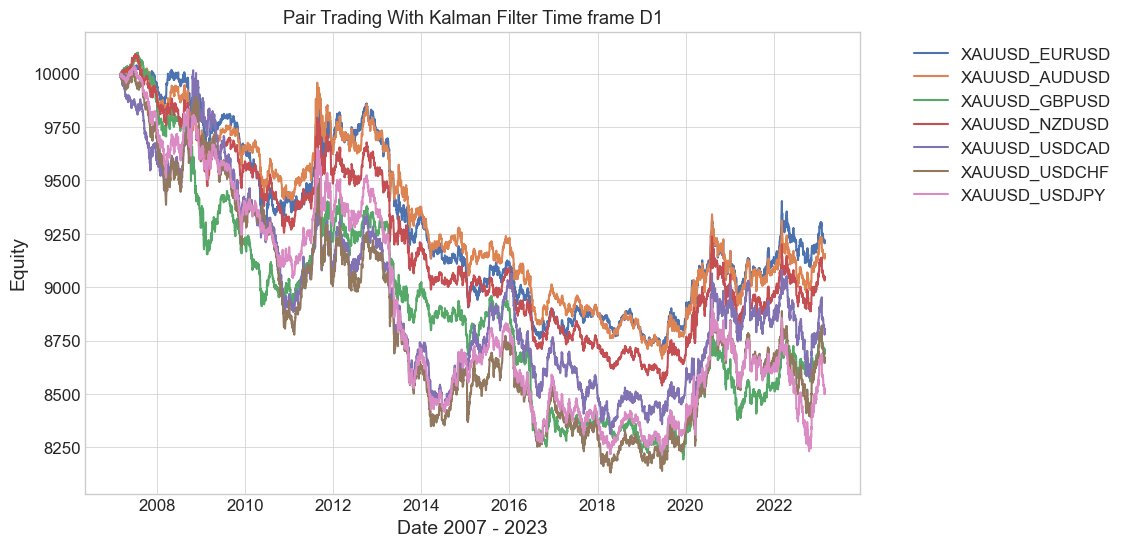

In [36]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD['D1'].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
            print('skip')
            # plt.plot(x, y, label=f'{data}',color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H4

In [37]:
TF = 'H4'

skip


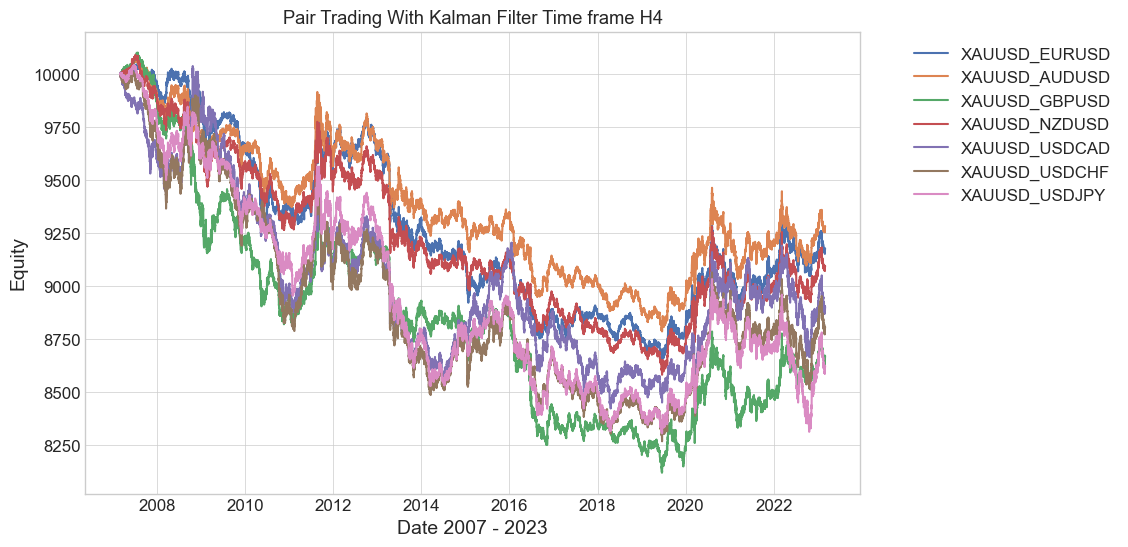

In [38]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
            print('skip')
            # plt.plot(x, y, label=f'{data}',color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H1

In [39]:
TF = 'H1'

skip


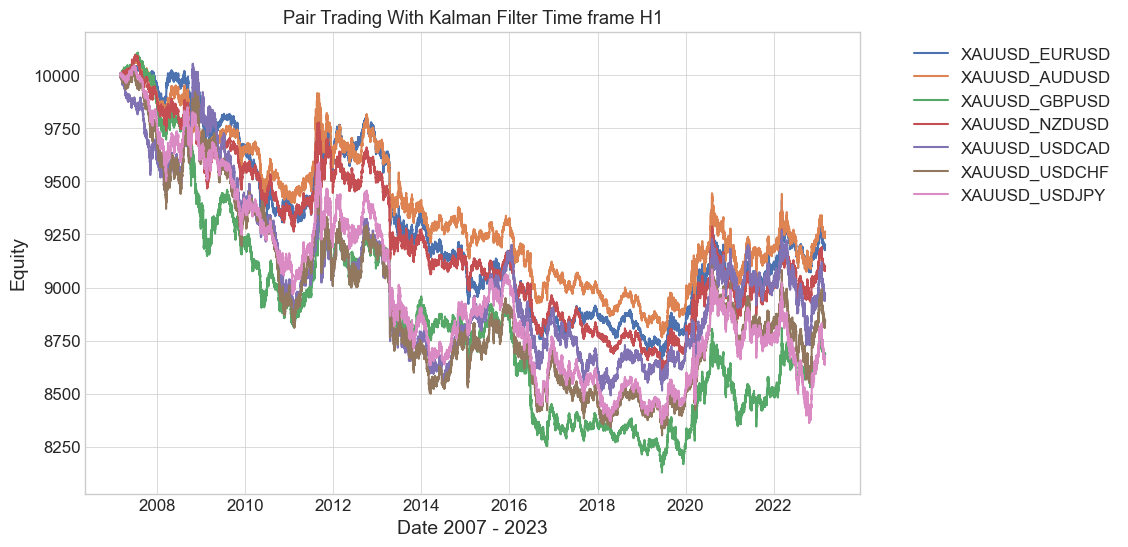

In [40]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
            print('skip')
            # plt.plot(x, y, label=f'{data}',color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF M30

In [41]:
TF = 'M30'

skip


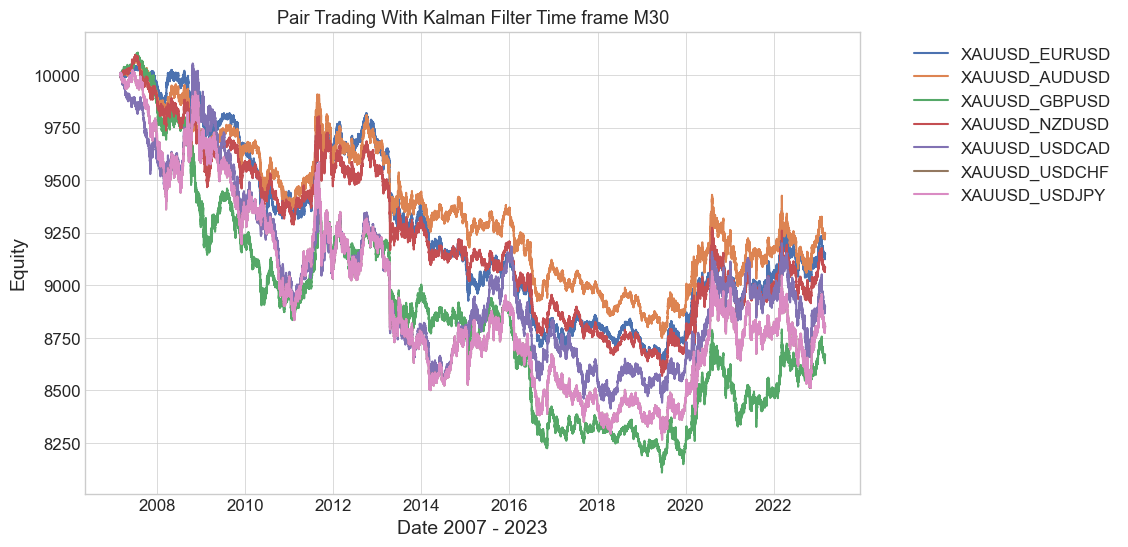

In [42]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
            print('skip')
            # plt.plot(x, y, label=f'{data}',color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()